# Import

In [11]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import re
import csv
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from patsy import dmatrices

In [2]:
train = pd.read_csv("train.csv", header = 0)
test = pd.read_csv("test.csv", header = 0)

# Analysis

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


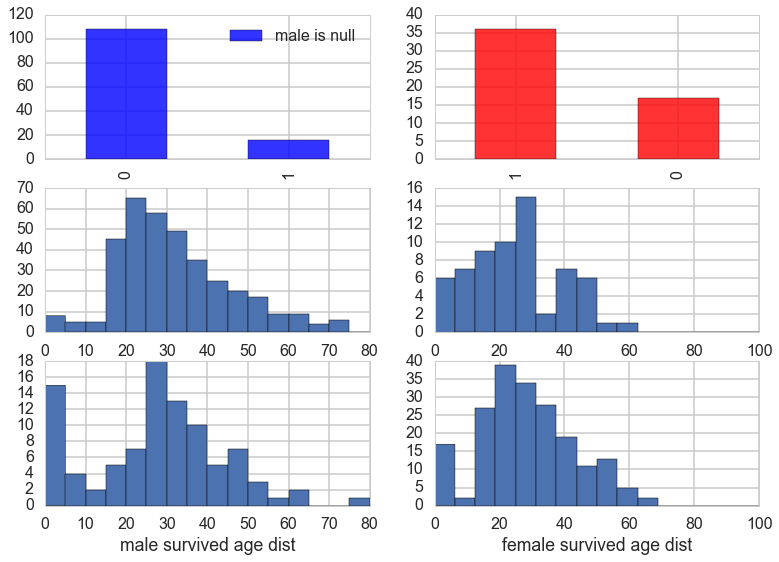

In [5]:
a = 0.8
plt.subplot(3,2,1)
male = train['Survived'][train['Sex'] == 'male'][train['Age'].isnull()].value_counts()
male.plot(kind = 'bar', label = 'male is null', alpha = a)
plt.legend()
plt.subplot(3,2,2)
female = train['Survived'][train['Sex'] == 'female'][train['Age'].isnull()].value_counts()
female.plot(kind = 'bar', label = 'female is null', color = 'r', alpha = a)

plt.subplot(3,2,3)
male_age1 = train['Age'][train['Sex'] == 'male'][train['Survived'] == 0].hist(bins = 16, range = (0,80))
male_age1.set_xlabel('male died age dist')

plt.subplot(3,2,4)
female_age1 = train['Age'][train['Sex'] == 'female'][train['Survived'] == 0].hist(bins = 16, range = (0,100))
female_age1.set_xlabel('female died age dist')

plt.subplot(3,2,5)
male_age2 = train['Age'][train['Sex'] == 'male'][train['Survived'] == 1].hist(bins = 16, range = (0,80))
male_age2.set_xlabel('male survived age dist')

plt.subplot(3,2,6)
female_age2 = train['Age'][train['Sex'] == 'female'][train['Survived'] == 1].hist(bins = 16, range = (0,100))
female_age2.set_xlabel('female survived age dist')
plt.show()

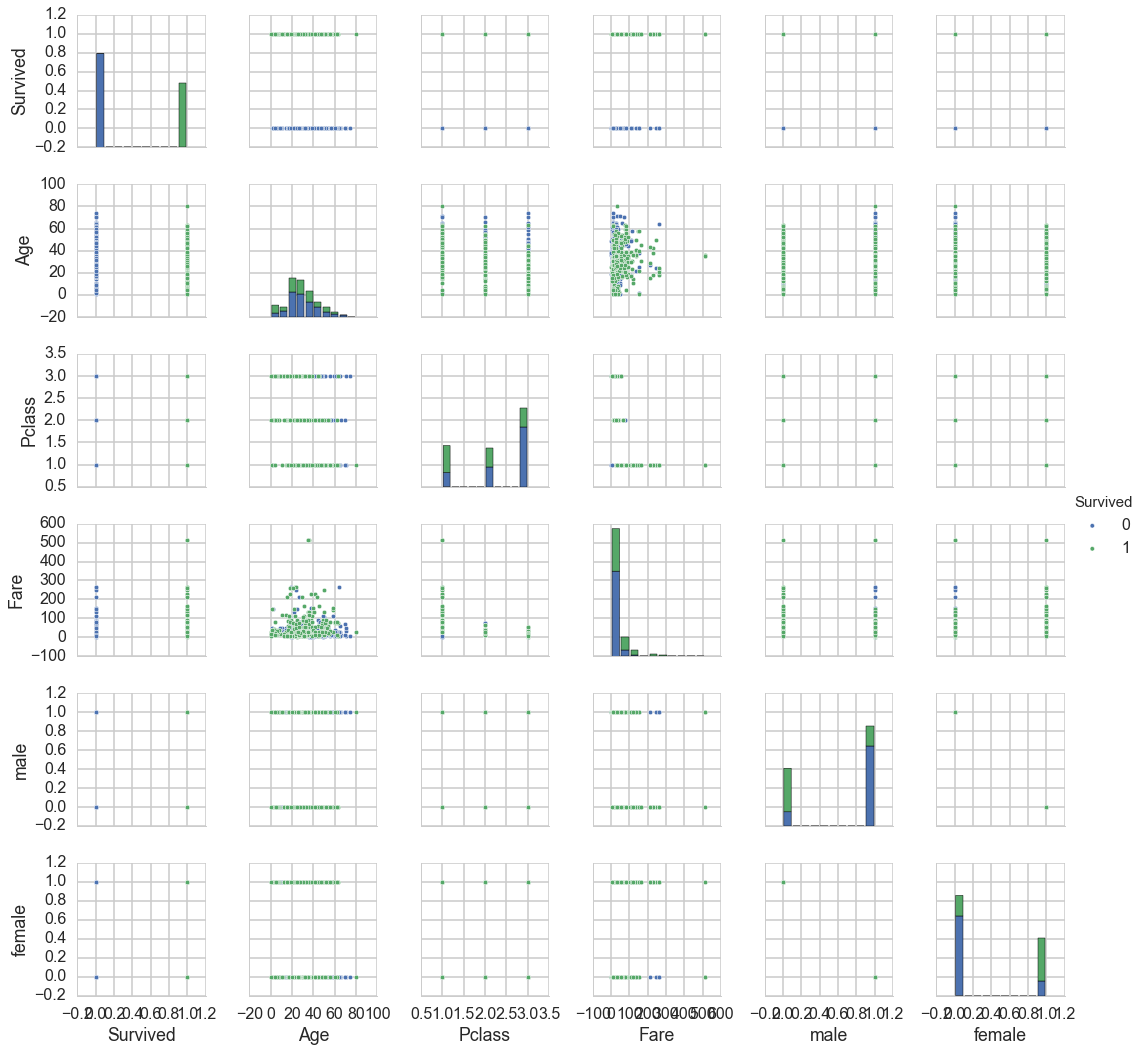

In [6]:
train = pd.concat([train, pd.get_dummies(train['Sex'])], axis = 1)



subset_0 = train[['Survived', 'Age', 'Pclass', 'Fare', 'male', 'female']].dropna()
sns.pairplot(subset_0, hue = 'Survived');

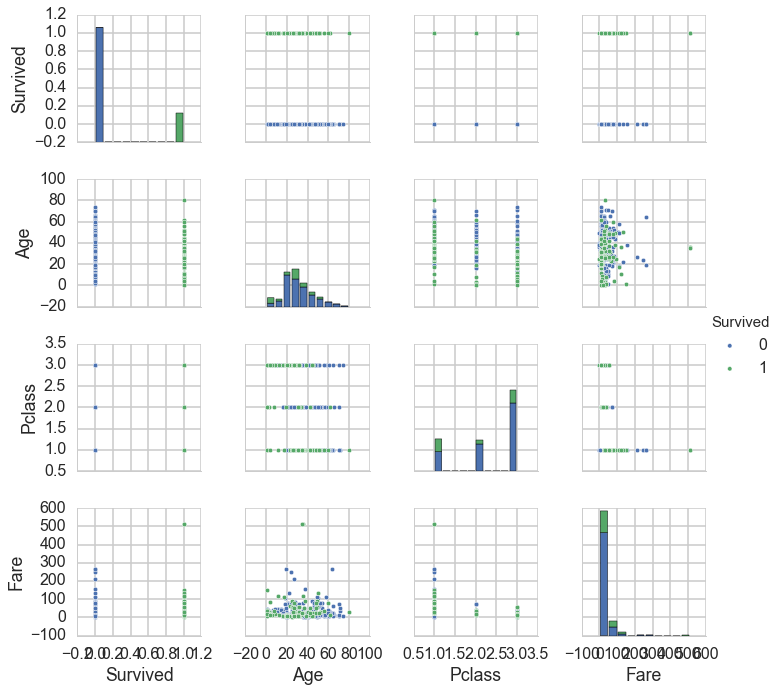

In [7]:
subset_1 = train[['Survived', 'Age', 'Pclass', 'Fare']][train['Sex'] == 'male'].dropna()
sns.pairplot(subset_1, hue = 'Survived');

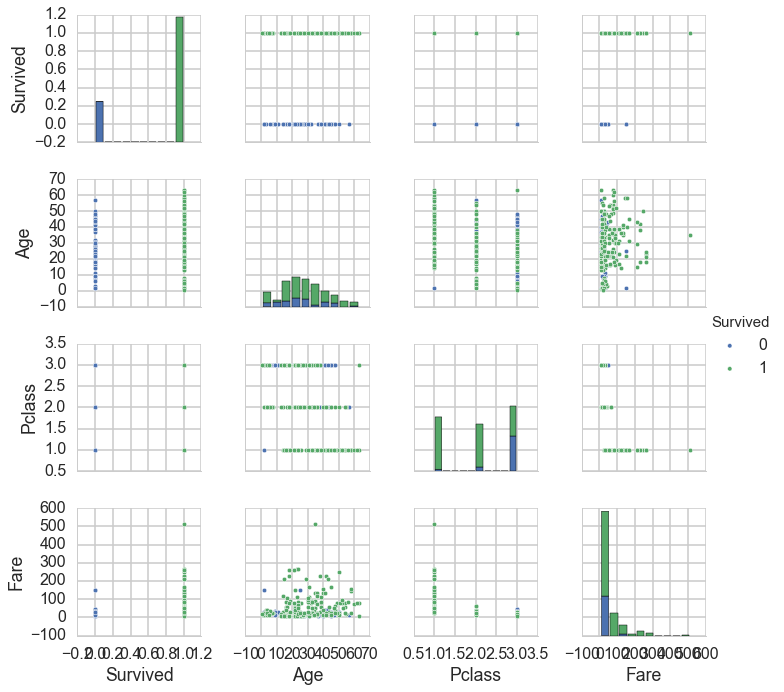

In [8]:
subset_2 = train[['Survived', 'Age', 'Pclass', 'Fare']][train['Sex'] == 'female'].dropna()
sns.pairplot(subset_2, hue = 'Survived');

In [9]:
pd.crosstab(train['Cabin'].str.extract("(\w)").fillna(""), train['Survived'])

Survived,0,1
Cabin,,
,481,206
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0


In [75]:
train = pd.read_csv("train.csv", header = 0)
test = pd.read_csv("test.csv", header = 0)

def clean_data(df):
    
    #gender and embarked binarization
    df = pd.concat([df, pd.get_dummies(df['Sex'])], axis = 1)
    df = pd.concat([df, pd.get_dummies(df['Embarked'].fillna('S'), prefix= 'Embarked')], axis = 1)
      
    #create new feature called famsize
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1.0
    df['Family']=df['SibSp']*df['Parch']
    #fare fix
    df.loc[ (df.Fare.isnull())&(df.Pclass==1),'Fare'] =np.median(df[df['Pclass'] == 1]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==2),'Fare'] =np.median( df[df['Pclass'] == 2]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==3),'Fare'] = np.median(df[df['Pclass'] == 3]['Fare'].dropna())
    df['Fare_Per_Person'] = df['Fare'] / df['FamilySize']

    #title
    title_transforms = {'Dona.': 'Mrs.',
                        'Countess.': 'Mrs.',
                        'Jonkheer.': 'Mr.',
                        'Capt.': 'Mr.',
                        'Don.': 'Mr.',
                        'Lady.': 'Mrs.',
                        'Major.': 'Mr.',
                        'Mlle.': 'Mrs.',
                        'Mme.': 'Mrs.',
                        'Sir.': 'Master.'}
    
    df['Title'] = df['Name'].str.extract("([\w]+\.)")
    df['Title'] = df.replace({'Title': title_transforms})['Title']
    def replace_titles(x):
        title=x['Title']
        if title in ['Mr.','Don.', 'Major.', 'Capt.', 'Jonkheer.', 'Rev.', 'Col.']:
            return 'Mr.'
        elif title in ['Master.']:
            return 'Master.'
        elif title in ['Countess.', 'Mme.','Mrs.']:
            return 'Mrs.'
        elif title in ['Mlle.', 'Ms.','Miss.']:
            return 'Miss.'
        elif title =='Dr.':
            if x['Sex']=='Male':
                return 'Mr.'
            else:
                return 'Mrs.'
        elif title =='':
            if x['Sex']=='Male':
                return 'Master.'
            else:
                return 'Miss.'
        else:
            return title

    df['Title']=df.apply(replace_titles, axis=1)
    df = pd.concat([df, pd.get_dummies(df['Title'], prefix = 'Title')], axis = 1)
    
    #age fix
    df['AgeFill'] = df['Age'].groupby(df['Title']).apply(lambda x: x.fillna(x.mean()))
    
    df['AgeCat']=df['AgeFill']
    df.loc[ (df.AgeFill<=10) ,'AgeCat'] = 'child'
    df.loc[ (df.AgeFill>60),'AgeCat'] = 'aged'
    df.loc[ (df.AgeFill>10) & (df.AgeFill <=30) ,'AgeCat'] = 'adult'
    df.loc[ (df.AgeFill>30) & (df.AgeFill <=60) ,'AgeCat'] = 'senior'
    df = pd.concat([df, pd.get_dummies(df['AgeCat'], prefix = 'Age_Cat')], axis = 1)
    
    #cabin fix
    df['Cabin_Category'] = df['Cabin'].str.extract("(\w)")
    df.loc[ (df.Cabin_Category.isnull())&(df.Pclass==1),'Cabin_Category'] = "C"
    df.loc[ (df.Cabin_Category.isnull())&(df.Pclass==2),'Cabin_Category'] = "F"
    df.loc[ (df.Cabin_Category.isnull())&(df.Pclass==3),'Cabin_Category'] = "F"
    df.loc[ (df.Cabin_Category == "T"), 'Cabin_Category'] = "F"
    df = pd.concat([df, pd.get_dummies(df['Cabin_Category'], prefix = 'Cabin_Cat')], axis = 1)
    
    
    #added features
    df['ClassFare']=df['Pclass']*df['Fare_Per_Person']
    df.loc[ (df.Fare_Per_Person<8) ,'HighLow'] = 0
    df.loc[ (df.Fare_Per_Person>=8) ,'HighLow'] = 1
    
    le = LabelEncoder()
    le.fit(df['Name'].apply(lambda x: x.split(",")[0]))
    df['Family_Name'] = le.transform(df['Name'].apply(lambda x: x.split(",")[0]))
    
    
    df = df.drop(['PassengerId', 'Age', 'AgeCat', 'Sex', 'Embarked', 'Cabin', 'Cabin_Category', 'Title'], axis = 1)
    return df

In [76]:
x = clean_data(train).drop('Survived', axis = 1)
y = train['Survived']
test_new = clean_data(test)

In [77]:
combined = pd.DataFrame({'Name': np.array(x['Name'].append(test_new['Name'])),
                         'SibSp': np.array(x['SibSp'].append(test_new['SibSp'])),
                         'Parch': np.array(x['Parch'].append(test_new['Parch']))})

combined['Family_Name'] = combined['Name'].apply(lambda x: x.split(",")[0])
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1.0
combined['FamId'] = combined['FamilySize'].astype(int).astype(str) + combined['Family_Name']
combined['FamId'] = np.where(combined['FamilySize'] < 3, 'Small', combined['FamId'])
small_fams = combined['FamId'].value_counts()[combined['FamId'].value_counts() < 3].index
combined['FamId'] = combined['FamId'].apply(lambda x: 'Small' if x in small_fams else x)

combined = pd.concat([combined, pd.get_dummies(combined['FamId'], prefix = 'Id')], axis = 1)
combined = combined.drop(['Name', 'Parch', 'SibSp', 'Family_Name', 'FamilySize', 'FamId'], axis = 1)
x = pd.concat([x, combined[:891]], axis = 1)
test_new = pd.concat([test_new, pd.DataFrame(combined[891:]).reset_index().drop('index', axis = 1)], axis = 1)
x = x.drop(['Name'], axis = 1)
test_new = test_new.drop(['Name'], axis = 1)

In [78]:
ticket = pd.DataFrame({'Ticket': np.array(x['Ticket'].append(test_new['Ticket']))})['Ticket']
ticket = ticket.apply(lambda x: x.split(" ")[0])
ticket = ticket.apply(lambda x: x.split("/")[0])
ticket = ticket.apply(lambda x: re.sub(r'[^\w]', '', x))
ticket = ticket.apply(lambda x: x if bool(re.search('(\D)', x)) else x[:2])
ticket = pd.concat([ticket, pd.get_dummies(ticket, prefix = "Ticket")], axis = 1)
ticket = ticket.drop(['Ticket'], axis = 1)
x = pd.concat([x, ticket[:891]], axis = 1)
test_new = pd.concat([test_new, pd.DataFrame(ticket[891:]).reset_index().drop('index', axis = 1)], axis = 1)
x = x.drop(['Ticket'], axis = 1)
test_new = test_new.drop(['Ticket'], axis = 1)

In [100]:
x = x.drop(['SibSp', 'Parch', 'ClassFare', 'HighLow'], axis = 1)
test_new = test_new.drop(['SibSp', 'Parch', 'ClassFare', 'HighLow'], axis = 1)

# Prediction

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
import scipy
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import StratifiedShuffleSplit

In [102]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size = .2)
stratcv = StratifiedShuffleSplit(y_train, n_iter = 10 , test_size = 0.2, train_size = None, random_state = 0)

In [103]:
clfl2=RandomForestClassifier()
parameters = {'n_estimators': [500],
              'max_depth': [10],
              'criterion': ['entropy'],
              'oob_score': [True],
              'bootstrap': [True],
              'min_samples_split': [2],
              'min_samples_leaf': [1],
              'max_features': ['auto'],
              'n_jobs': [1],
              'random_state': [0],
              'verbose':[0]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv= stratcv, scoring="accuracy")
fitmodel.fit(x_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=10, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
             oob_score=True, random_state=0, verbose=0, warm_start=False),
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500,
  'n_jobs': 1,
  'oob_score': True,
  'random_state': 0,
  'verbose': 0},
 0.84825174825174821,
 [mean: 0.84825, std: 0.02403, params: {'oob_score': True, 'n_jobs': 1, 'verbose': 0, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 500, 'min_samples_split': 2, 'random_state': 0, 'criterion': 'entropy', 'max_features': 'auto', 'max_depth': 10}])

In [112]:
feature_importance = pd.DataFrame({'features': x.columns,
                                   'importances': fitmodel.best_estimator_.feature_importances_})
feature_importance

,features,importances
0,Pclass,0.039640
1,Fare,0.073779
2,female,0.093892
3,male,0.093923
4,Embarked_C,0.008035
5,Embarked_Q,0.005484
6,Embarked_S,0.010467
7,FamilySize,0.033303
8,Family,0.020172
9,Fare_Per_Person,0.071437


In [95]:
for i in range(1, 11):
    clf=fitmodel.best_estimator_
    clf.fit(x_train, y_train)
    x_train_pred = clf.predict(x_train)
    x_test_pred = clf.predict(x_test)
    print "train-test accuracy: %s - %s %s" %(accuracy_score(x_train_pred, y_train), accuracy_score(x_test_pred, y_test), i)

train-test accuracy: 0.941011235955 - 0.804469273743 1
train-test accuracy: 0.941011235955 - 0.804469273743 2


KeyboardInterrupt: 

In [329]:
for i in range(1, 11):
    clf=XGBClassifier(n_estimators=100, max_depth = i, reg_lambda = 1, reg_alpha = 1)
    clf.fit(x_train, y_train)
    x_train_pred = clf.predict(x_train)
    x_test_pred = clf.predict(x_test)
    print "train-test accuracy: %s - %s %s" %(accuracy_score(x_train_pred, y_train), accuracy_score(x_test_pred, y_test), i)

train-test accuracy: 0.84691011236 - 0.810055865922 1
train-test accuracy: 0.866573033708 - 0.804469273743 2
train-test accuracy: 0.904494382022 - 0.810055865922 3
train-test accuracy: 0.932584269663 - 0.826815642458 4
train-test accuracy: 0.953651685393 - 0.821229050279 5
train-test accuracy: 0.964887640449 - 0.815642458101 6
train-test accuracy: 0.973314606742 - 0.821229050279 7
train-test accuracy: 0.974719101124 - 0.815642458101 8
train-test accuracy: 0.977528089888 - 0.826815642458 9
train-test accuracy: 0.977528089888 - 0.815642458101 10


In [104]:
clf=fitmodel.best_estimator_
output = clf.predict(test_new)
test_ids = test['PassengerId']

In [105]:
predictions_file = open("titanic_20160708.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(test_ids, output))
predictions_file.close()

This will result in a prediction accuracy of 79.904%, which is better but not there yet :(